In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from time import time
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

In [2]:
demand = pd.read_csv('data/pca.csv')

In [3]:
demand.columns

Index(['gas_dome', 'gas_non_dome', 'gas_total', 'pop', 'households', '0_15',
       '16_19', '20_29', '30_39', '40_49', '50_74', '75_', 'ce_pop', 'gdp',
       'temp', 'one', 'children', 'other', 'size'],
      dtype='object')

In [4]:
# drop y to create X
X = demand.drop(['gas_dome', 'gas_non_dome', 'gas_total'], axis=1).values

# the name list of independent variables
dema = demand.drop(['gas_dome', 'gas_non_dome', 'gas_total'], axis=1)
list_var_X = dema.columns.tolist()

y = demand.loc[:,['gas_dome']].values

In [5]:
# standardisation of the X. This is essential for PCA.
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
X = StandardScaler().fit_transform(X)

In [6]:
from sklearn.decomposition import PCA
rand_st_int = 1412
# reproducible
# n_components=2
pca = PCA(random_state=rand_st_int)
# fit the components
X_new_components = pca.fit_transform(X)

In [7]:
newpca = pd.DataFrame(X_new_components, columns = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10',
                                                   'pc11','pc12','pc13','pc14','pc15','pc16'])
newpca.shape

(22, 16)

In [8]:
print('Explained variance ratio of each component:')
print(pca.explained_variance_ratio_)

Explained variance ratio of each component:
[6.58494801e-01 1.68221956e-01 1.05433561e-01 3.80973566e-02
 2.11329604e-02 3.96373202e-03 2.84483018e-03 8.93393272e-04
 7.29078486e-04 1.19644299e-04 3.48514816e-05 2.70973282e-05
 5.94299212e-06 7.90685279e-07 4.16932781e-09 8.03816651e-14]


In [9]:
print('Eigenvalues of each component:')
print(pca.explained_variance_)

Eigenvalues of each component:
[1.10376271e+01 2.81972041e+00 1.76726731e+00 6.38584262e-01
 3.54228670e-01 6.64396987e-02 4.76847725e-02 1.49749729e-02
 1.22207441e-02 2.00546635e-03 5.84177215e-04 4.54202835e-04
 9.96158679e-05 1.32533913e-05 6.98858757e-08 1.34734981e-12]


Text(0, 0.5, 'PC2')

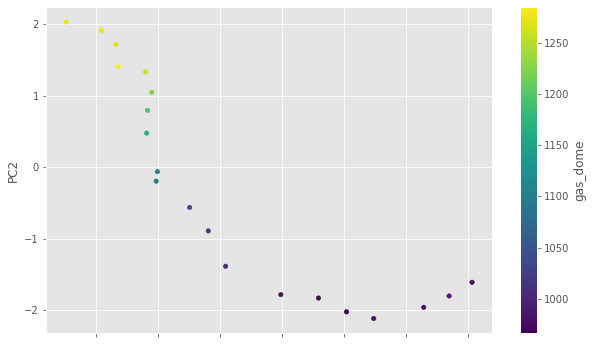

In [10]:
df_X_new_coord = pd.DataFrame(X_new_components)
# adding the MEDV variable to df_X_new_coord
df_X_new_coord = df_X_new_coord.assign(gas_dome = demand.gas_dome)
ax = df_X_new_coord.plot.scatter(x = 0, y = 1, c = "gas_dome", colormap="viridis", figsize=(10,6))
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

<AxesSubplot:>

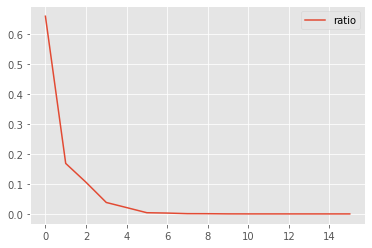

In [11]:
result = pd.DataFrame(pca.explained_variance_ratio_, columns = ['ratio'])
result.plot()

<AxesSubplot:xlabel='PC'>

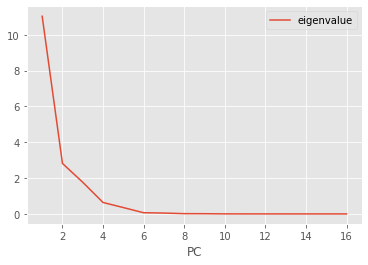

In [12]:
df = pd.DataFrame({'eigenvalue':pca.explained_variance_,
             'PC':list(range(1, pca.n_components_ + 1))})
df.plot.line(x = 'PC', y = 'eigenvalue')

In [13]:
newpca

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16
0,-3.4756,2.0324,0.9247,0.4550,1.2466,-0.4717,-0.1579,0.2201,0.0805,0.0223,-0.0323,-0.0012,0.0060,0.0013,0.0002,0.0000
1,-2.9092,1.9135,-0.2583,1.2018,0.7303,0.0085,-0.0687,-0.0981,-0.0457,-0.0345,0.0256,-0.0163,-0.0099,-0.0045,0.0001,-0.0000
2,-2.6723,1.7198,-0.2110,0.6872,0.6080,0.2362,-0.1003,-0.1255,-0.0417,-0.0310,0.0431,0.0392,0.0000,0.0017,-0.0003,0.0000
3,-2.6346,1.4097,-0.5074,0.0207,0.0733,0.2128,0.1106,-0.1829,0.0556,0.1125,-0.0197,-0.0336,0.0086,0.0044,-0.0003,0.0000
4,-2.1956,1.3336,-1.9658,-1.2266,-0.0706,0.4234,-0.1262,0.0384,-0.1304,0.0274,-0.0262,0.0160,0.0003,-0.0037,0.0002,-0.0000
5,-2.0956,1.0494,-2.4921,-0.4122,-0.7462,-0.0148,-0.1391,0.1056,-0.0800,-0.0670,-0.0248,-0.0215,-0.0037,-0.0009,-0.0001,-0.0000
6,-2.1642,0.7965,-1.3198,-0.4370,-0.9013,-0.3154,0.0437,0.1041,0.1391,-0.0338,0.0368,-0.0024,0.0052,0.0055,0.0002,0.0000
7,-2.1787,0.4788,0.1546,-0.7942,-0.6530,-0.2691,0.1306,-0.0056,0.1196,0.0323,0.0293,0.0216,-0.0059,-0.0023,-0.0003,-0.0000
8,-2.0045,-0.0602,0.8356,-0.0109,-0.5744,-0.3319,0.3398,-0.1931,-0.1154,0.0398,-0.0203,0.0230,-0.0075,0.0001,0.0004,-0.0000
9,-2.0251,-0.1939,2.7283,-1.5552,0.2575,-0.0538,0.1581,-0.1606,-0.0408,-0.0963,-0.0089,-0.0221,0.0076,-0.0013,0.0000,0.0000


In [14]:
result

,ratio
0,0.6585
1,0.1682
2,0.1054
3,0.0381
4,0.0211
5,0.0040
6,0.0028
7,0.0009
8,0.0007
9,0.0001


### PCA regression

In [15]:
# create a new X dataset including three PCs
X_pc = X_new_components[0:20,[0,1]]
y_pc = y[0:20,:]

In [16]:
# split the traing and testing dataset
split_rand_state = 11
train_X_pc, test_X_pc, train_y_pc, test_y_pc = train_test_split(X_pc, y_pc, random_state=split_rand_state)

In [17]:
test_X_pc

array([[-2.6346128 ,  1.40971304],
       [-2.0955951 ,  1.04939854],
       [-1.48439849, -0.56125715],
       [-2.1642108 ,  0.79649087],
       [ 0.5935766 , -1.82865867]])

In [18]:
# train a new model
lr_pc = LinearRegression()
lr_pc.fit(X=train_X_pc, y=train_y_pc)

print('R2:')
lr_pc.score(X=train_X_pc, y=train_y_pc)

R2:


0.9834924407115218

In [19]:
# measure the model performance
lr_pc.score(X=test_X_pc, y=test_y_pc)

0.9424470638595884

In [20]:
regressor_gas = sm.OLS(endog=y_pc, exog=sm.add_constant(X_pc)).fit()
regressor_gas.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     354.9
Date:                Mon, 22 Aug 2022   Prob (F-statistic):           1.37e-14
Time:                        02:49:26   Log-Likelihood:                -87.024
No. Observations:                  20   AIC:                             180.0
Df Residuals:                      17   BIC:                             183.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1133.9364      7.225    156.955      0.000    1118.694    1149.179
x1             7.9002      4.783      1.652      0.117      -2.190      17.990
x2            92.0682      6.433     14.311      0.000      78.495     105.642
==============================================================================
Omnibus:                        0.114   Durbin-Watson:                   1.056
Prob(Omnibus):                  0.945   Jarque-Bera (JB):                0.048
Skew:                           0.045   Prob(JB):                        0.976
Kurtosis:                       2.778   Cond. No.                         5.39
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
X_pre = X_new_components[20:,[0,1]]

In [22]:
y_2040_lr = lr_pc.predict(X_pre)

In [23]:
y_2040_lr

array([[1407.66331085],
       [1404.41710497]])

### ANN

In [40]:
# create a new X dataset including three PCs
X_ann = X_new_components[0:20,[0,1]]
y_ann = y[0:20,:]

In [41]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X_ann)
TargetVarScalerFit=TargetVarScaler.fit(y_ann)

# Generating the standardized values of X and y
X_ann=PredictorScalerFit.transform(X_ann)
y_ann=TargetVarScalerFit.transform(y_ann)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ann, y_ann, test_size=0.25, random_state=1412)

# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(15, 2)
(15, 1)
(5, 2)
(5, 1)


In [42]:
# importing the libraries
from keras.models import Sequential
from keras.layers import Dense
 
# create ANN model
model = Sequential()
 
# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=5, input_dim=2, kernel_initializer='normal', activation='relu'))
 
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
 
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))
 
# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')
 
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 20, epochs = 50, verbose=1)

Epoch 1/50
1/1 [==============================] - 0s 379ms/step - loss: 0.9312
Epoch 2/50
1/1 [==============================] - 0s 6ms/step - loss: 0.9307
Epoch 3/50
1/1 [==============================] - 0s 21ms/step - loss: 0.9301
Epoch 4/50
1/1 [==============================] - 0s 5ms/step - loss: 0.9296
Epoch 5/50
1/1 [==============================] - 0s 6ms/step - loss: 0.9291
Epoch 6/50
1/1 [==============================] - 0s 12ms/step - loss: 0.9285
Epoch 7/50
1/1 [==============================] - 0s 3ms/step - loss: 0.9280
Epoch 8/50
1/1 [==============================] - 0s 8ms/step - loss: 0.9274
Epoch 9/50
1/1 [==============================] - 0s 5ms/step - loss: 0.9268
Epoch 10/50
1/1 [==============================] - 0s 4ms/step - loss: 0.9262
Epoch 11/50
1/1 [==============================] - 0s 9ms/step - loss: 0.9256
Epoch 12/50
1/1 [==============================] - 0s 7ms/step - loss: 0.9250
Epoch 13/50
1/1 [==============================] - 0s 4ms/step - loss

In [43]:
# Defining a function to find the best parameters for ANN
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20, 25, 30]
    epoch_list  =   [5, 10, 50, 100]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=5, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
 
            # Defining the Second layer of the model
            model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))
 
            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))
 
            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')
 
            # Fitting the ANN to the Training set
            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)
 
            MAPE = np.mean(100 * (np.abs(y_test-model.predict(X_test))/y_test))
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)
            
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)

In [44]:
# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)

1 Parameters: batch_size: 5 - epochs: 5 Accuracy: 76.71529674444703
2 Parameters: batch_size: 5 - epochs: 10 Accuracy: 68.74605842763391
3 Parameters: batch_size: 5 - epochs: 50 Accuracy: 170.03456787354733
4 Parameters: batch_size: 5 - epochs: 100 Accuracy: 209.4997670671667
5 Parameters: batch_size: 10 - epochs: 5 Accuracy: 75.19927218644719
6 Parameters: batch_size: 10 - epochs: 10 Accuracy: 74.61882917467635
7 Parameters: batch_size: 10 - epochs: 50 Accuracy: 64.09171927943078
8 Parameters: batch_size: 10 - epochs: 100 Accuracy: 133.87600971600827
9 Parameters: batch_size: 15 - epochs: 5 Accuracy: 76.91793879586439
10 Parameters: batch_size: 15 - epochs: 10 Accuracy: 72.71296578279227
11 Parameters: batch_size: 15 - epochs: 50 Accuracy: 67.85996293736822
12 Parameters: batch_size: 15 - epochs: 100 Accuracy: 90.84758905838967
13 Parameters: batch_size: 20 - epochs: 5 Accuracy: 76.75415645399832
14 Parameters: batch_size: 20 - epochs: 10 Accuracy: 73.29981228201994
15 Parameters: bat

<AxesSubplot:xlabel='Parameters'>

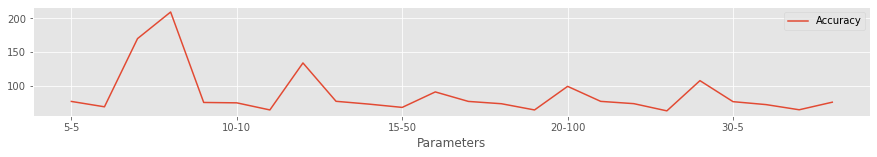

In [45]:
%matplotlib inline
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,2), kind='line')

In [46]:
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 5, epochs = 100, verbose=0)
 
# Generating Predictions on testing data
Predictions=model.predict(X_test)
 
# Scaling the predicted Consumption data back to original Consumption scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)
 
# Scaling the y_test Consumption data back to original Consumption scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)
 
# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)

Predictors=['pc1', 'pc2']

TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['Consumption']=y_test_orig
TestingData['PredictedConsumption']=Predictions

In [47]:
# Computing the absolute percent error
APE=100*(abs(TestingData['Consumption']-TestingData['PredictedConsumption'])/TestingData['Consumption'])
TestingData['APE']=APE
 
print('The Accuracy of ANN model is:', 100-np.mean(APE))
TestingData.head()

The Accuracy of ANN model is: 97.53891099767887


,pc1,pc2,Consumption,PredictedConsumption,APE
0,-2.0956,1.0494,"1,224.0000","1,197.2800",2.1830
1,-2.6346,1.4097,"1,284.5200","1,224.2878",4.6891
2,-2.1956,1.3336,"1,258.0000","1,214.2019",3.4816
3,1.0459,-2.0216,966.5000,970.2489,0.3879
4,-2.0251,-0.1939,"1,098.0000","1,115.1718",1.5639


In [48]:
y_results=model.predict(X_train)
y_results=TargetVarScalerFit.inverse_transform(y_results)
y_train=TargetVarScalerFit.inverse_transform(y_train)
from sklearn.metrics import r2_score
print(r2_score(y_train, y_results))

0.9641409564086033


In [49]:
from sklearn.metrics import r2_score
print(r2_score(y_test_orig, Predictions))

0.9065553813936004


<AxesSubplot:>

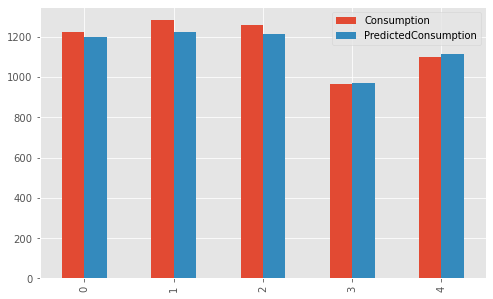

In [50]:
TestingData.plot( y=['Consumption', 'PredictedConsumption'], figsize=(8,5),kind="bar")

In [51]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import r2_score #R square

def mape(y_test_orig, Predictions):
    return np.mean(np.abs((y_test_orig - Predictions) / y_test_orig)) * 100
 
def smape(y_test_orig, Predictions):
    return 2.0 * np.mean(np.abs(y_test_orig - Predictions) / (np.abs(Predictions) + np.abs(y_test_orig))) * 100
 
# y_true = np.array([1.0, 5.0, 4.0, 3.0, 2.0, 5.0, -3.0])
# y_pred = np.array([1.0, 4.5, 3.5, 5.0, 8.0, 4.5, 1.0])
 
MSE = metrics.mean_squared_error(y_test_orig, Predictions)
print( f"MSE = { MSE } ") # 8.107142857142858

RMSE = np.sqrt(metrics.mean_squared_error(y_test_orig, Predictions))
print(f"RMSE = { RMSE } ") # 2.847304489713536

MAE = metrics.mean_absolute_error(y_test_orig, Predictions)
print(f"MAE = { MAE } ") # 1.9285714285714286

MAPE = mape(y_test_orig, Predictions)
print(f"MAPE = { MAPE } ") # 76.07142857142858，即76%

SMAPE = smape(y_test_orig, Predictions)
print(f"SMAPE = { SMAPE } ") # 57.76942355889724，即58%

r2 = r2_score(y_test_orig, Predictions)
print(f"R-square = { r2 } " )

MSE = 1313.8132527082726 
RMSE = 36.24656194328329 
MAE = 30.334175781249996 
MAPE = 2.4610890023211383 
SMAPE = 2.498181478856606 
R-square = 0.9065553813936004 


In [52]:
X_pre = X_new_components[20:,[0,1]]

In [53]:
# Generating Predictions on 2040 data
annPredictions2040=model.predict(X_pre)
 
# Scaling the predicted Consumption data back to original Consumption scale
annPredictions2040=TargetVarScalerFit.inverse_transform(annPredictions2040)


In [54]:
annPredictions2040

array([[1030.1465],
       [1026.9142]], dtype=float32)